In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.linear_model

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
vgsales = pd.read_csv('./vgsales.csv')

In [3]:
vgsales.shape

(16598, 11)

In [4]:
vgsales.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [5]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
vgsales.describe().T.style

,count,mean,std,min,25%,50%,75%,max
Rank,16598,8300.61,4791.85,1,4151.25,8300.5,12449.8,16600
Year,16327,2006.41,5.82898,1980,2003,2007,2010,2020
NA_Sales,16598,0.264667,0.816683,0,0,0.08,0.24,41.49
EU_Sales,16598,0.146652,0.505351,0,0,0.02,0.11,29.02
JP_Sales,16598,0.0777817,0.309291,0,0,0,0.04,10.22
Other_Sales,16598,0.048063,0.188588,0,0,0.01,0.04,10.57
Global_Sales,16598,0.537441,1.55503,0.01,0.06,0.17,0.47,82.74


In [7]:
vgsales.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [8]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
# checking the null values
vgsales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

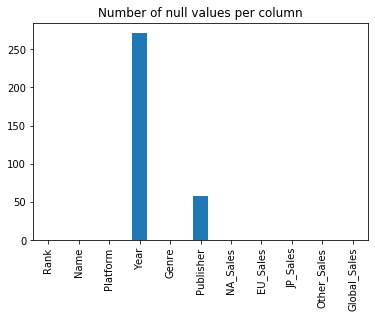

In [10]:
# plotting number of null values
vgsales.isnull().sum().plot(kind='bar'); 
plt.title('Number of null values per column');

In [11]:
# Dropping null values in the dataset
# I decide to drop null values because it will decrease the efficiency of the data cleaning and the visualizations bellow
vgsales.dropna(how='any', inplace=True)

In [12]:
vgsales.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [13]:
vgsales.shape

(16291, 11)

In [14]:
# Calculating the mean in every columns
vgsales.mean(axis=0)

Rank            8290.190228
Year            2006.405561
NA_Sales           0.265647
EU_Sales           0.147731
JP_Sales           0.078833
Other_Sales        0.048426
Global_Sales       0.540910
dtype: float64

In [15]:
# Calculating the median in Year column
vgsales['Year'].median()

2007.0

In [16]:
# Calculating the mode in year column
vgsales['Year'].mode()

0    2009.0
dtype: float64

In [17]:
# Calculating the max and min in Global Sales column
mx = vgsales['Global_Sales'].max()
mn = vgsales['Global_Sales'].min()
print(mx)
print(mn)

82.74
0.01


In [18]:
# For each EU Sales and JP Sales, calculate the minimum and maximum Global Sales.
EU = vgsales.groupby('EU_Sales').Global_Sales.agg(['min', 'max'])
JP = vgsales.groupby('JP_Sales').Global_Sales.agg(['min', 'max'])
print (EU,JP)

            min    max
EU_Sales              
0.00       0.01   5.95
0.01       0.01  11.66
0.02       0.02   2.50
0.03       0.03   2.15
0.04       0.04   4.07
...         ...    ...
9.27      21.40  21.40
11.00     24.76  24.76
11.01     33.00  33.00
12.88     35.82  35.82
29.02     82.74  82.74

[305 rows x 2 columns]             min    max
JP_Sales              
0.00       0.01  10.26
0.01       0.01   9.52
0.02       0.02   9.20
0.03       0.03   6.24
0.04       0.04  10.21
...         ...    ...
6.04      18.36  18.36
6.50      30.01  30.01
6.81      40.24  40.24
7.20      23.10  23.10
10.22     31.37  31.37

[244 rows x 2 columns]


In [36]:
# for reports in X360, calculating the most common game name
vgsales[vgsales.Platform == 'X360']['Name'].value_counts()[:5]

Need for Speed: Most Wanted                           2
Karaoke Revolution Presents American Idol Encore 2    1
Clannad                                               1
Magna Carta 2                                         1
Soldier of Fortune: Payback                           1
Name: Name, dtype: int64

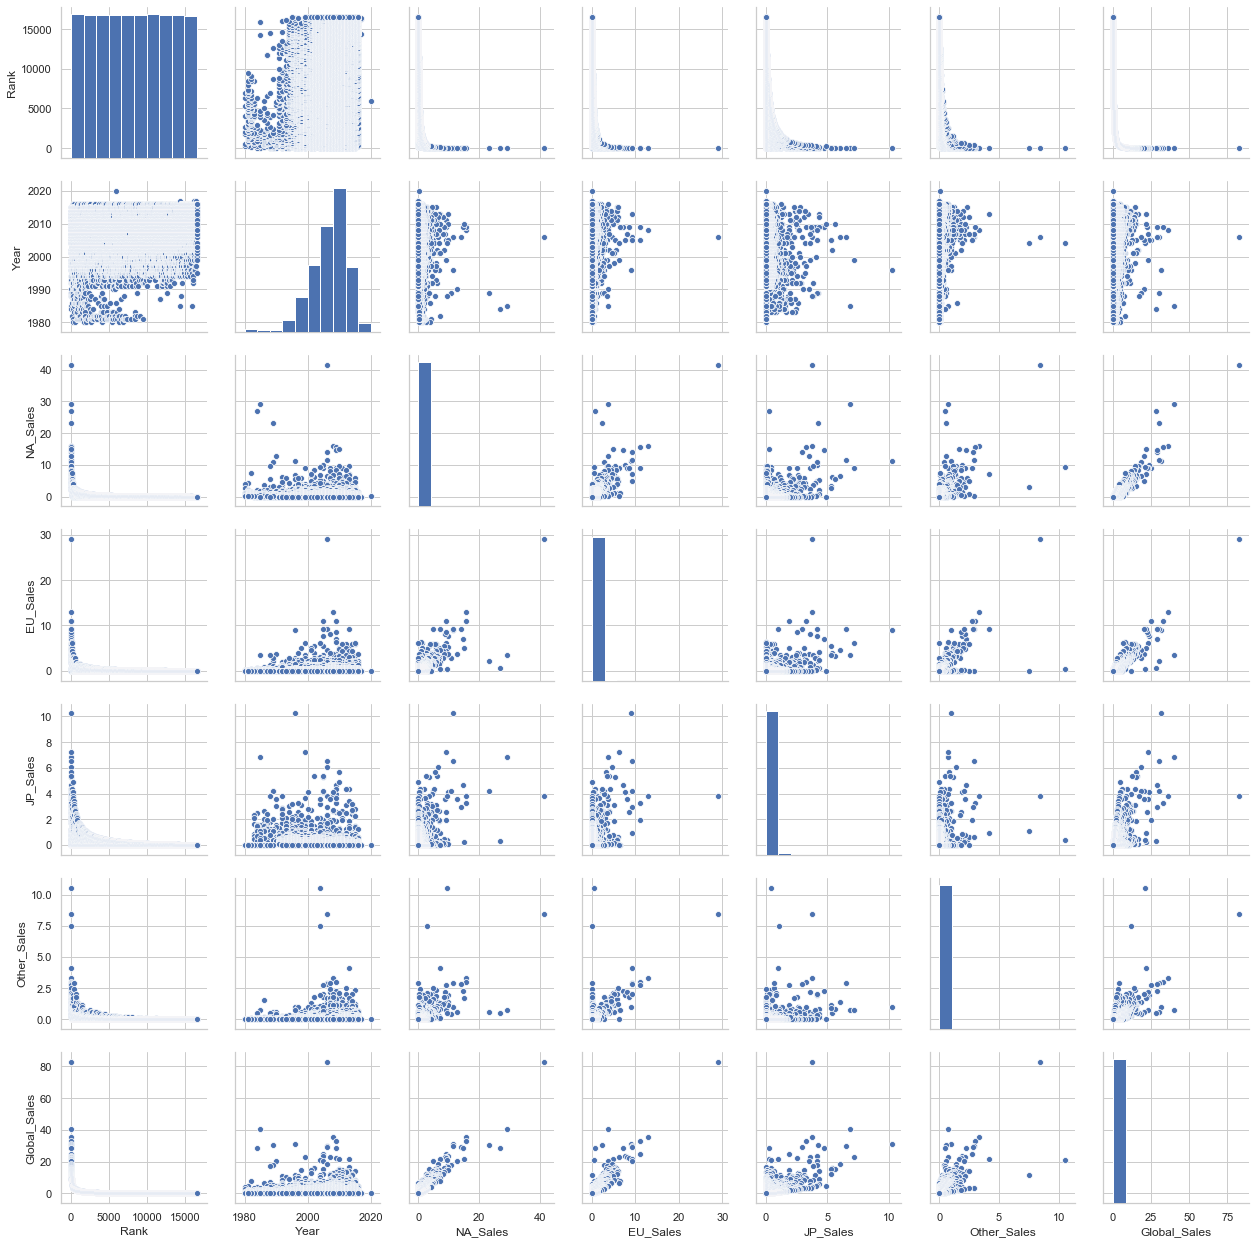

In [30]:
# plot relationship for every columns
sns.pairplot(vgsales);

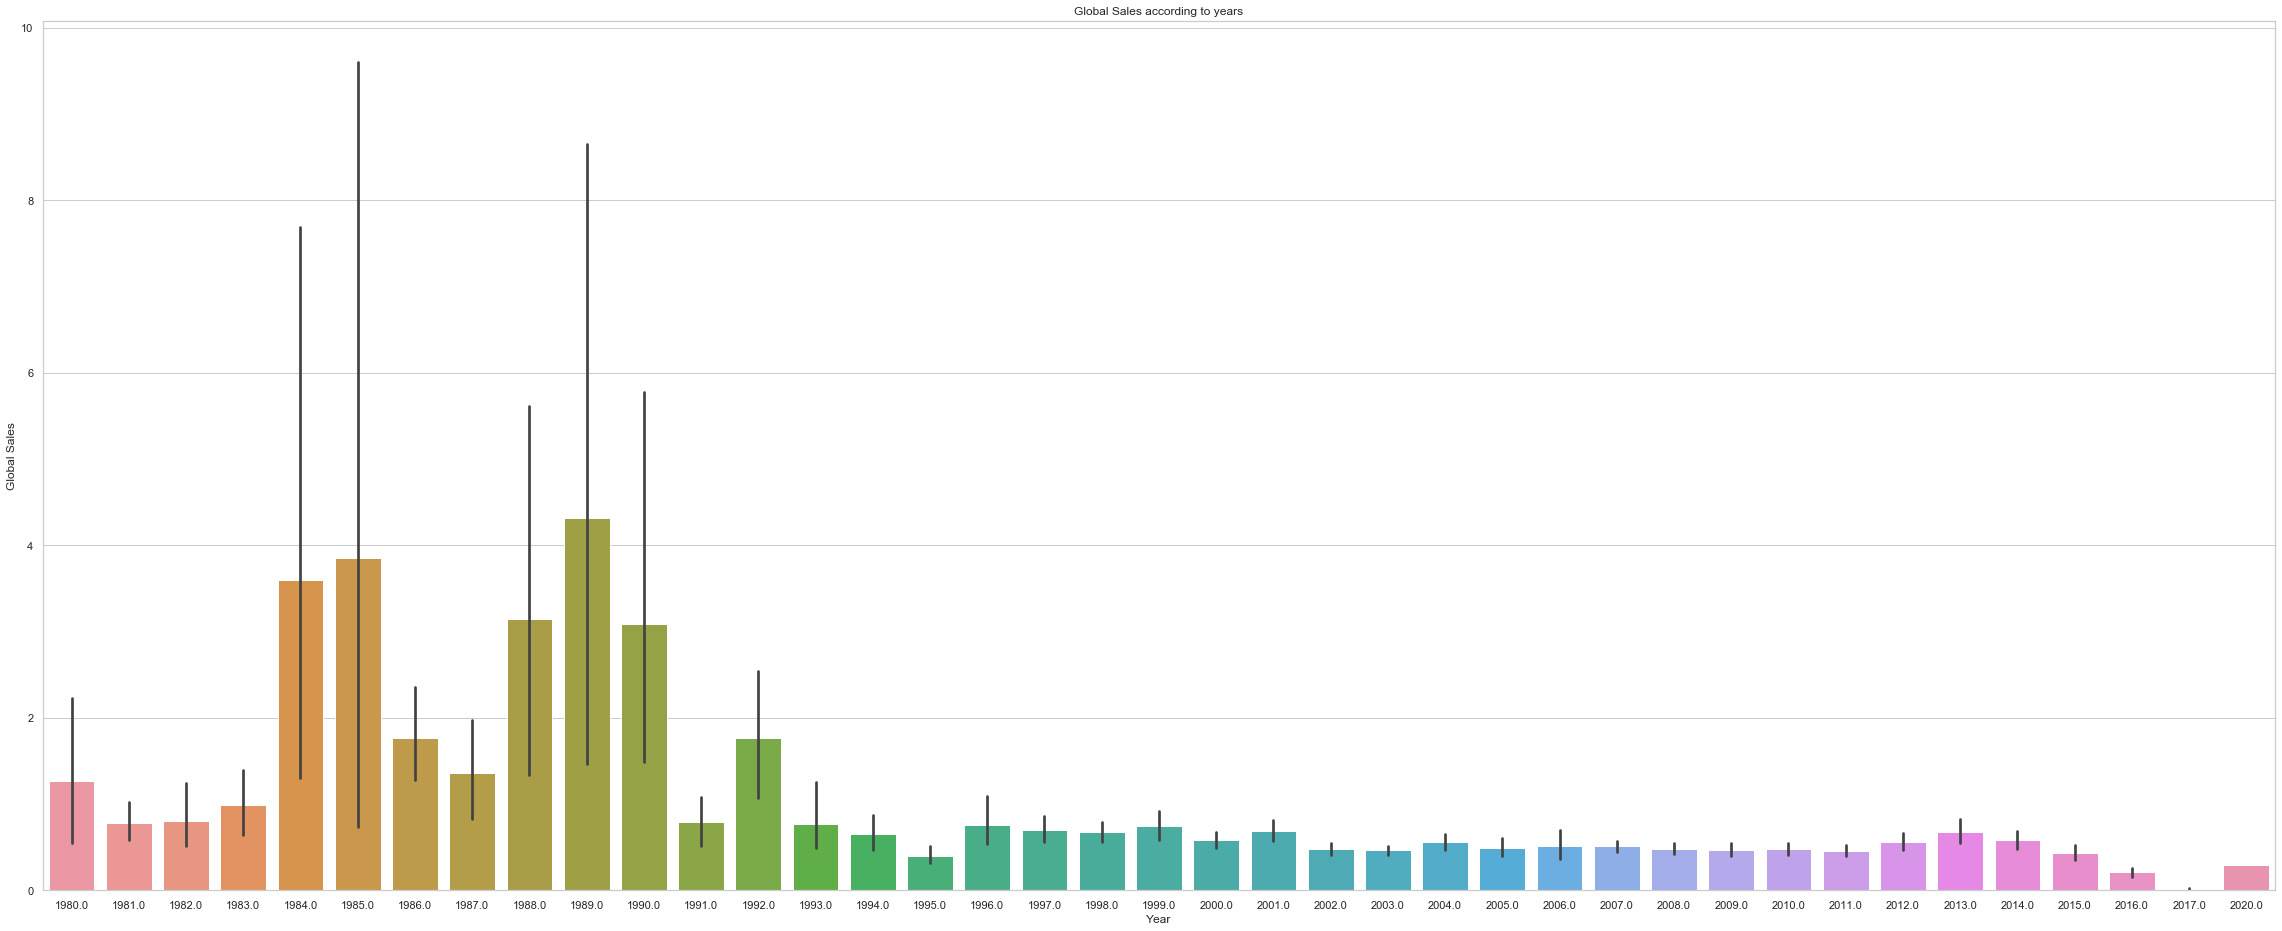

In [21]:
# Global Sales according to years
plt.figure(figsize=(40,16))
sns.set(style="whitegrid")
z=sns.barplot(y='Global_Sales',x='Year',data=vgsales)
z.set_title("Global Sales according to years")
z.set_ylabel("Global Sales")
z.set_xlabel("Year");

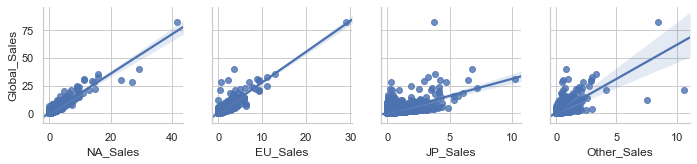

In [22]:
# Showing relationship between each of : NA_Sales, EU_Sales, JP_Sales, Other_Sales with Global_Sales
countries_col = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sns.pairplot(vgsales, x_vars=countries_col, y_vars='Global_Sales', kind='reg');

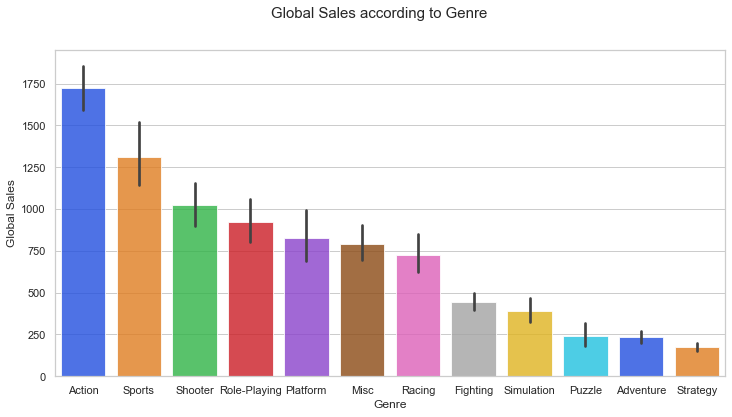

In [35]:
# Global Sales according to Genre
fig = plt.figure(figsize=(12,6))
fig.suptitle('Global Sales according to Genre', fontsize=15)
ax = sns.barplot(x='Genre',y='Global_Sales',data=vgsales,estimator=np.sum,order = vgsales.groupby('Genre')\
['Global_Sales'].sum().sort_values(ascending=False).reset_index()['Genre'].unique(),\
palette='bright',alpha=0.8)
ax.set_ylabel('Global Sales');

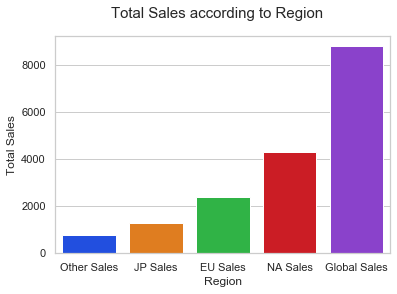

In [33]:
# Compare between each region with total sales
dic = [['NA Sales' , vgsales.NA_Sales.sum()], ['EU Sales', vgsales.EU_Sales.sum()],\
['JP Sales' , vgsales.JP_Sales.sum()],
['Other Sales' , vgsales.Other_Sales.sum()], ['Global Sales', vgsales.Global_Sales.sum()]]
vgsales_from_dic = pd.DataFrame(data=dic,index = [0,1,2,3,4],columns = ['Region','Total_Sales'])
fig = plt.figure()
fig.suptitle('Total Sales according to Region', fontsize=15)
axes = sns.barplot(x='Region',y='Total_Sales',data=vgsales_from_dic,palette="bright",order = vgsales_from_dic
.set_index('Region')['Total_Sales'].sort_values(ascending=True).reset_index()['Region'].unique())
axes.set_ylabel('Total Sales');

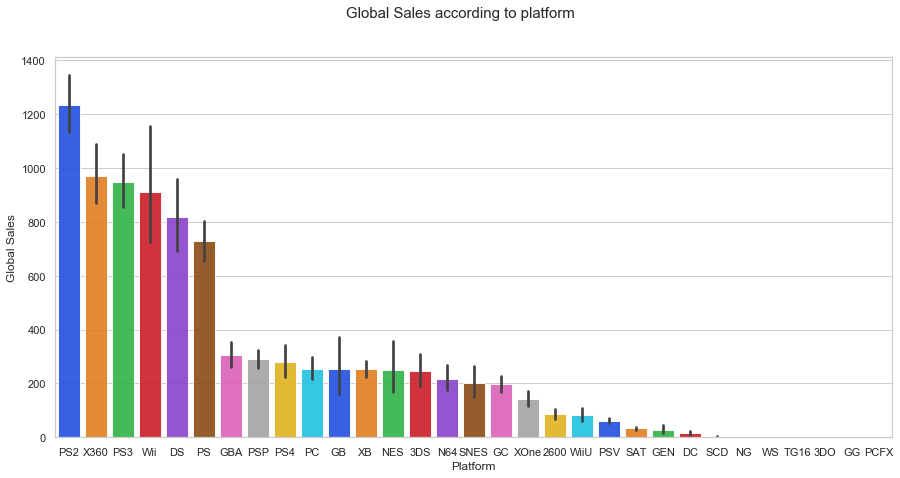

In [34]:
# Global Sales according to Platform
fig = plt.figure(figsize=(15,7))
fig.suptitle('Global Sales according to platform', fontsize=15)
ax = sns.barplot(x='Platform',y='Global_Sales',data=vgsales,estimator=np.sum,order = vgsales.groupby('Platform')
['Global_Sales'].sum().sort_values(ascending=False).reset_index()['Platform'].unique(),palette='bright',alpha=0.9)
ax.set_ylabel('Global Sales');

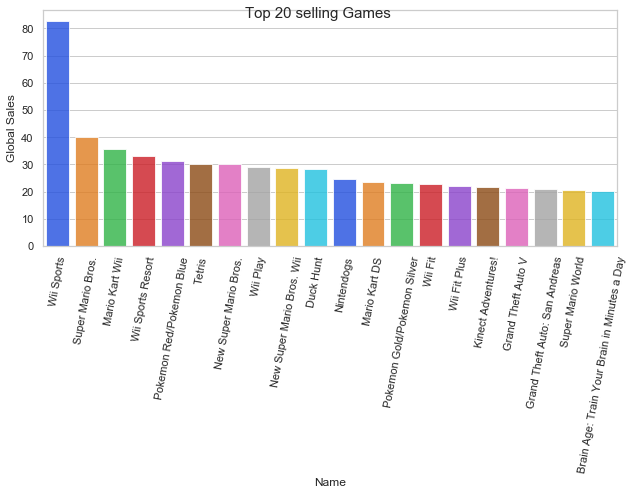

In [26]:
# Top 20 selling Games
vgsales[['Name','Global_Sales']].set_index('Name')
fig = plt.figure(figsize=(9,7))
fig.suptitle('Top 20 selling Games', fontsize=15)
ax = sns.barplot(x='Name',y='Global_Sales',data=vgsales.head(20),order = vgsales['Name'].head(20).unique(),
palette='bright',alpha=0.8)
ax.set_ylabel('Global Sales')
plt.xticks(rotation=79.5)
plt.tight_layout()

In [27]:
# Identify shortcomings:
# this dataset is quite huge, have alot of null values
# and having a lot of strings but fortunately our focusing will be on numerical values.

In [28]:
# Identify assumptions:
# regarding to the data above we can see that most global sales happened on year 1998, Action have the most global sales per genre
# the other sales made the least total sales, ps2 have the most global sales per platform and Wii sports
# have the most global sales per name. 

In [29]:
# Identify next steps:
# I'll identify the correlation, skew between columns and initiates sklearn using linear regression to predict global sales
# also I'll calculate the mean absolute error, mean squared error, root mean squared error, intercept, cofficient
# and I'll initiates sklearn on regression trees and plot the tree and calculates the score